# Explore qflx

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_settings import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [3]:
from src.constants import OCEAN_DATA_PATH

In [4]:
import xarray as xr

In [5]:
import os

In [6]:
xr.open_dataset(os.path.join(OCEAN_DATA_PATH, "qflx.nc"), decode_times=False)

<xarray.Dataset>
Dimensions:  (T: 12, X: 360, Y: 181, Z: 1)
Coordinates:
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * Z        (Z) float32 1.0
Data variables:
    qflx     (T, Z, Y, X) float32 ...

In [8]:
from src.xr_utils import open_dataarray

In [9]:
qflx = open_dataarray(os.path.join(OCEAN_DATA_PATH, "qflx.nc"))
qflx_0 = open_dataarray(os.path.join(OCEAN_DATA_PATH, "qflx-0.nc"))
diff = qflx - qflx_0

In [10]:
import matplotlib.pyplot as plt

In [11]:
vmin, vmax = -0.0002, 0.0002

In [12]:
da = xr.concat([qflx.isel(Z=0), qflx_0.isel(Z=0), diff.isel(Z=0)], dim="flux")
da = (
    da.assign_coords(coords={"flux": ["qflx", "qflx-0", "diff"]})
    .isel(variable=0)
    .drop(labels="Z")
)
da

<xarray.DataArray (flux: 3, T: 12, Y: 181, X: 360)>
array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
...
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]]], dtype=float32)
Coordinates:
  * T         (T) object 1960-01-16 00:00:00 ... 1960-12-16 00:00:00
  * X         (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y         (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    variable  <U4 'qflx'
  * flux      (flux) <U6 'qflx' 'qflx-0' 'diff'

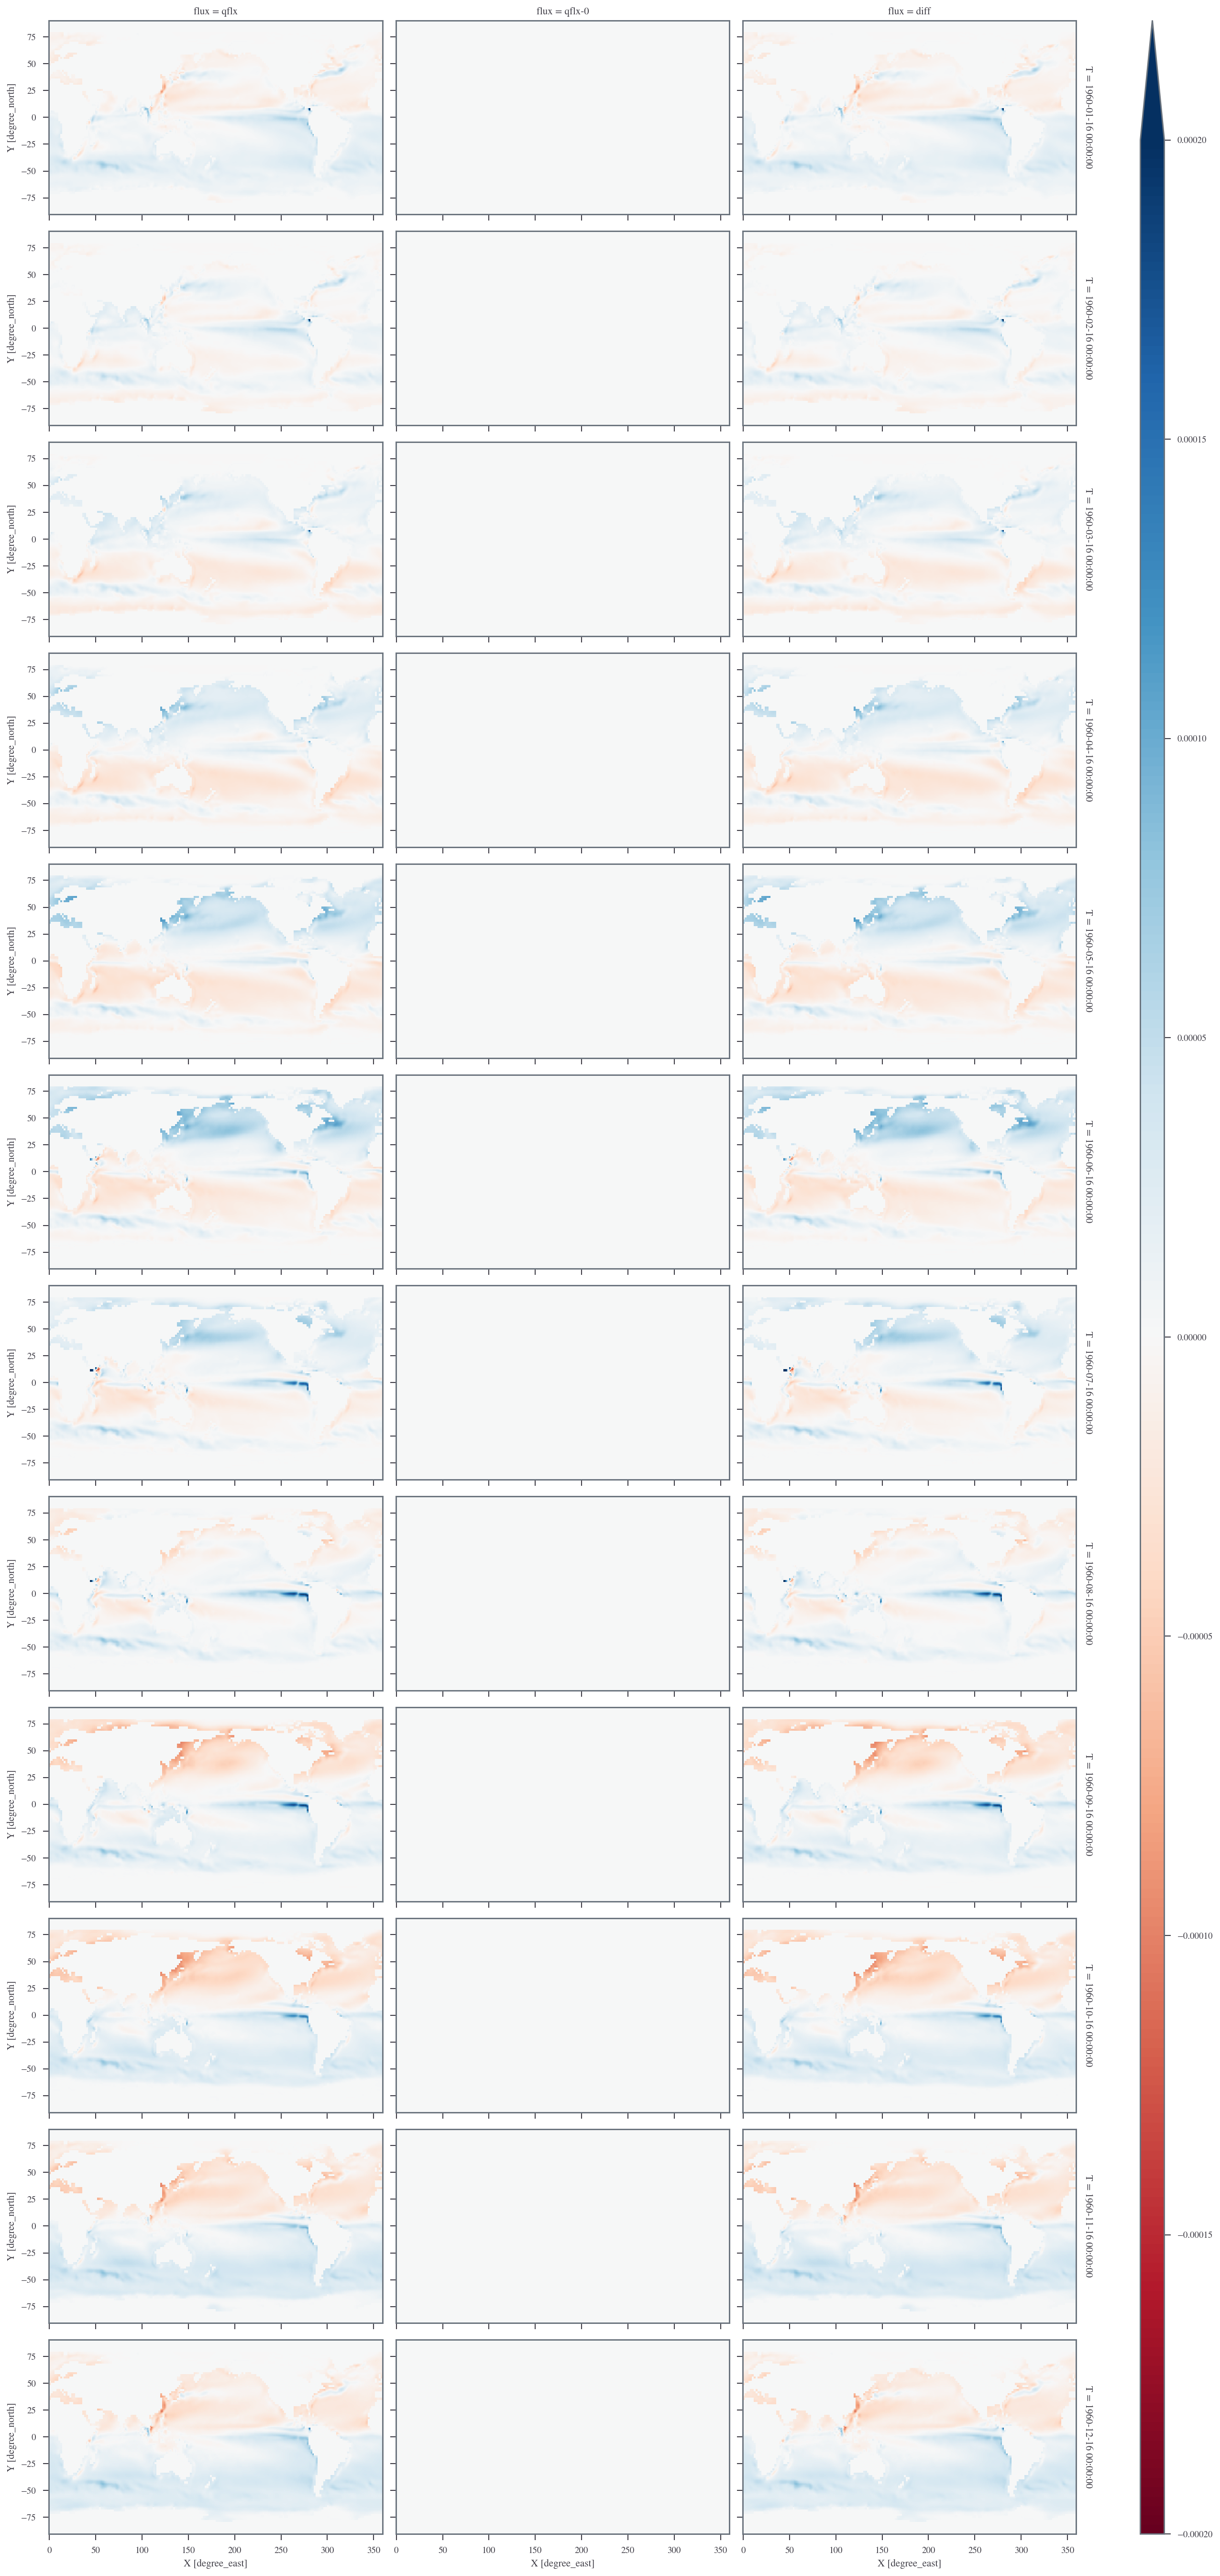

In [13]:
da.plot(
    col="flux",
    row="T",
    vmin=vmin,
    vmax=vmax,
    cmap="RdBu",
    aspect=2,
    cbar_kwargs={"shrink": 1, "aspect": 100},
)

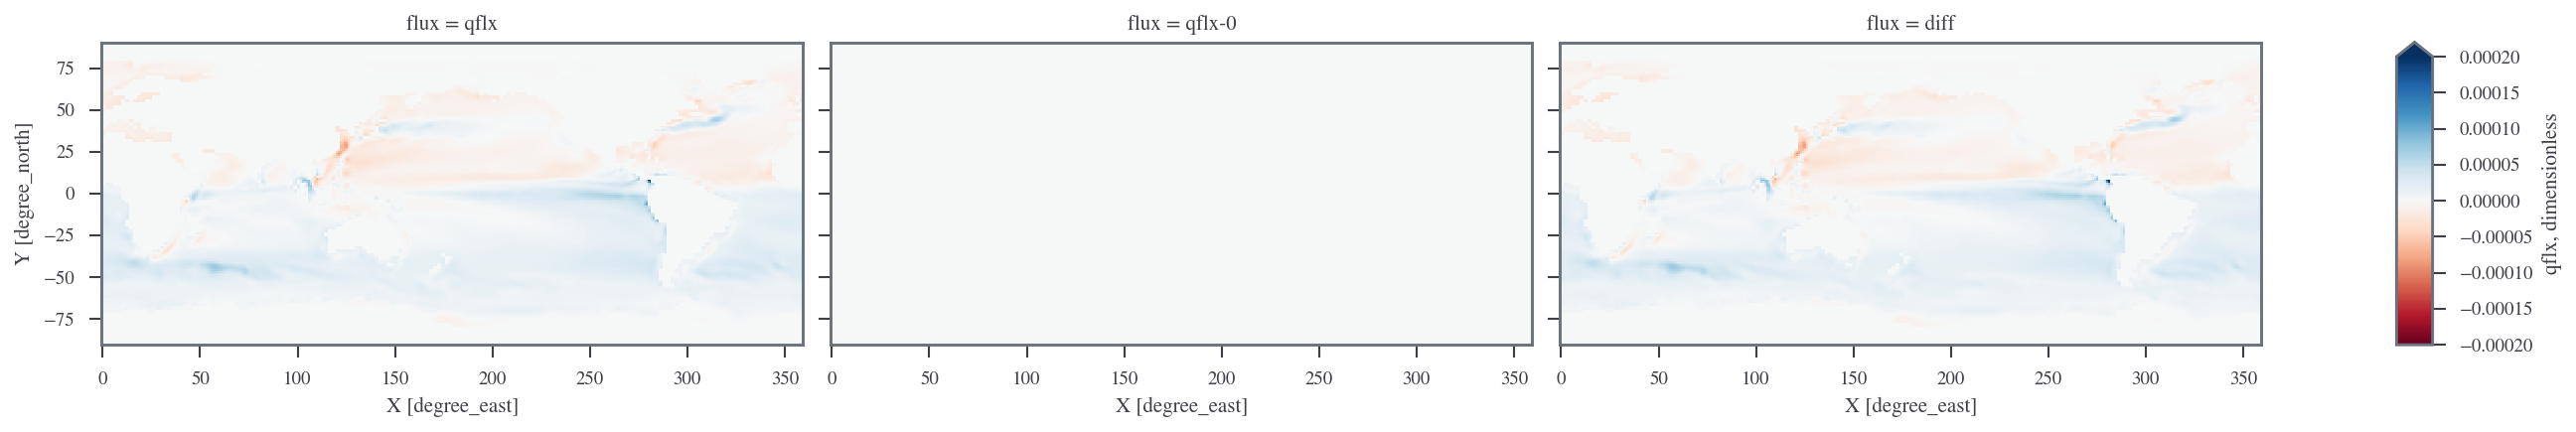

In [14]:
da.isel(T=0).plot(
    col="flux",
    vmin=vmin,
    vmax=vmax,
    cmap="RdBu",
    aspect=2,
    cbar_kwargs={"shrink": 1, "aspect": 8, "label": "qflx, dimensionless"},
)

Text(0.5, 1.03, '1960-01-16')

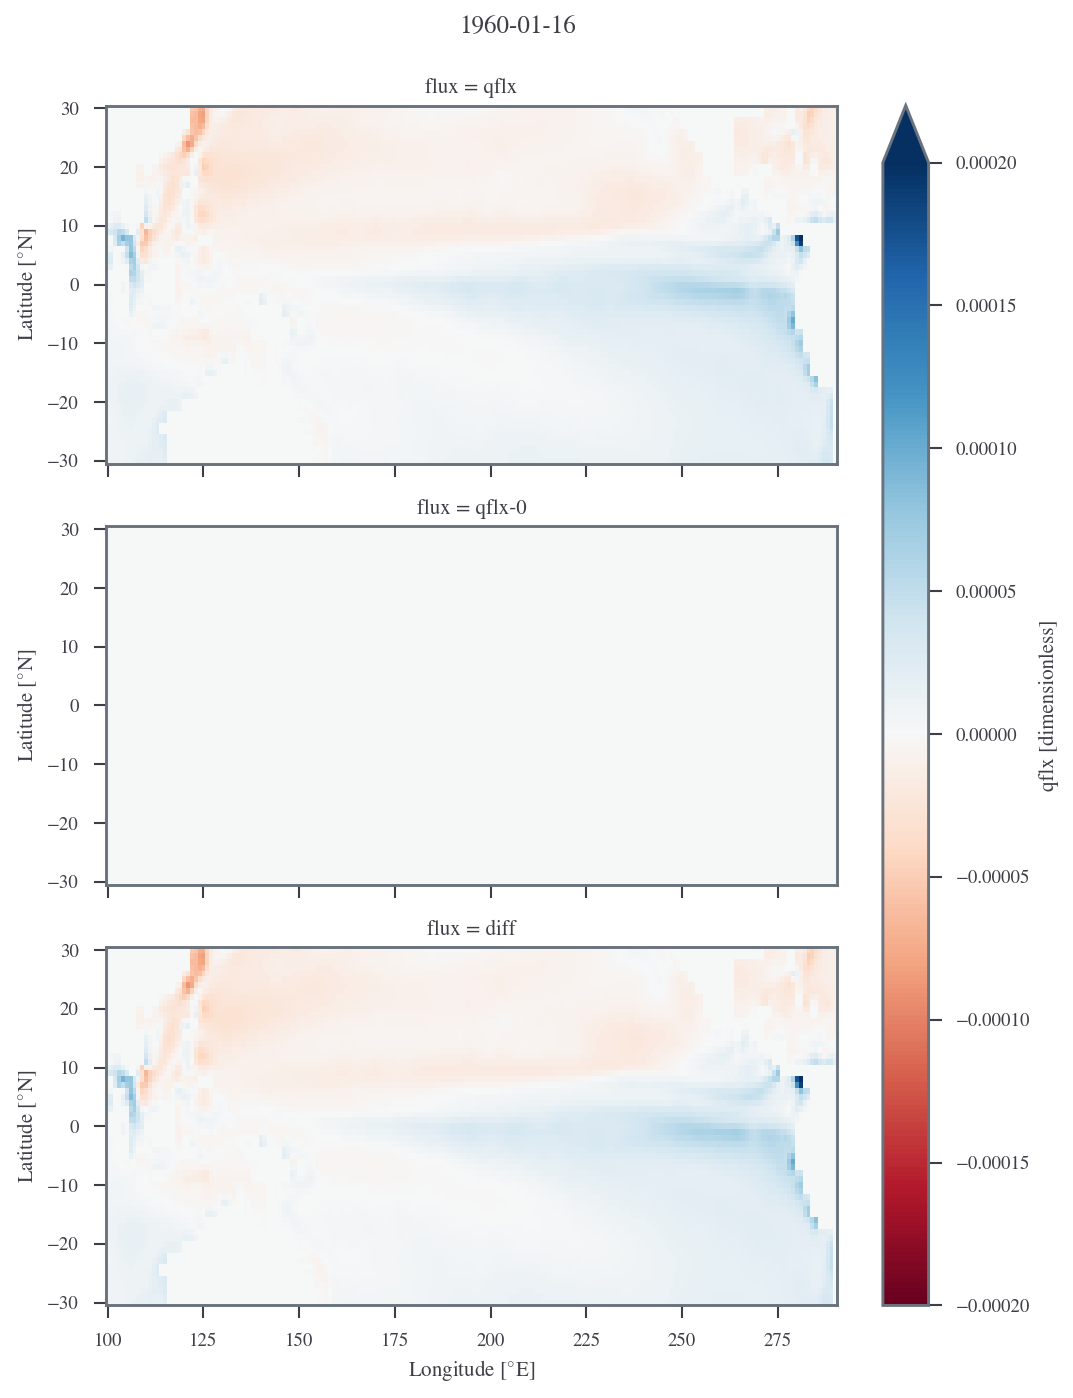

In [15]:
da.X.attrs["units"] = r"$^{\circ}$E"
da.Y.attrs["units"] = r"$^{\circ}$N"
da.Y.attrs["long_name"] = "Latitude"
da.X.attrs["long_name"] = "Longitude"

items = (
    da.isel(T=0)
    .sel(X=slice(100, 290), Y=slice(-30, 30))
    .plot(
        row="flux",
        vmin=vmin,
        vmax=vmax,
        cmap="RdBu",
        aspect=2,
        cbar_kwargs={"shrink": 1, "aspect": 25, "label": "qflx [dimensionless]"},
    )
)
plt.suptitle(da.coords["T"].values[0].strftime()[0:10], y=1.03)

In [16]:
print(da.coords["T"].values[0])

1960-01-16 00:00:00


## Animate qflx vs qflx-0

In [17]:
from src.visualisation.ani import animate_qflx_diff
from src.constants import GIF_PATH, DATA_PATH, OCEAN_PATH

In [79]:
animate_qflx_diff()

/home/users/sithom/seager19/gifs/diff-output.gif: 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]


Video /home/users/sithom/seager19/gifs/diff-output.gif made.
'animate_qflx_diff'  11.11098 s 



![qflx-new](gifs/diff-output.gif)


In [14]:
os.listdir(DATA_PATH / "ocean-model" / "DATA")

['rzk.pro',
 'spline_ECMWF.txt',
 'dQdf-sample.nc',
 'om_mask.nc',
 'qflx.nc',
 'tau-ECMWF.y',
 'sst-ECMWF-clim.nc',
 'tau-ECMWF.x',
 'dQdT-sample.nc',
 'qflx-0.nc',
 'tau-ECMWF-clim.x',
 'tau-ECMWF-clim.y']

In [55]:
animate_qflx_diff(
    path_a=DATA_PATH / "ocean-model" / "DATA" / "qflx.nc",
    path_b=DATA_PATH / "ocean-model" / "DATA" / "qflx-0.nc",
    video_path=str(GIF_PATH / "orig_qflx_diff.gif"),
)

/home/users/sithom/seager19/gifs/orig_qflx_diff.gif: 100%|██████████| 12/12 [00:08<00:00,  1.46it/s]


Video /home/users/sithom/seager19/gifs/orig_qflx_diff.gif made.
'animate_qflx_diff'  12.43871 s 



![qflx-old](gifs/orig_qflx_diff.gif)

In [45]:
from src.utils import open_dataarray

da = open_dataarray(DATA_PATH / "ocean-model" / "DATA" / "qflx-0.nc")

In [46]:
assert da.min() == 0.0 and da.max() == 0.0

So the qflx-0 dataarray was originally blank. I should check that it now works better.

In [47]:
from src.constants import TEST_DIREC

In [56]:
animate_qflx_diff(
    path_a=TEST_DIREC / "ocean" / "DATA" / "qflx.nc",
    path_b=TEST_DIREC / "ocean" / "DATA" / "qflx-0.nc",
    video_path=str(GIF_PATH / "orig_qflx_diff_run.gif"),
)

/home/users/sithom/seager19/gifs/orig_qflx_diff_run.gif: 100%|██████████| 12/12 [00:06<00:00,  1.84it/s]


Video /home/users/sithom/seager19/gifs/orig_qflx_diff_run.gif made.
'animate_qflx_diff'  10.56599 s 



![test](gifs/orig_qflx_diff_run.gif)

## Look at mask

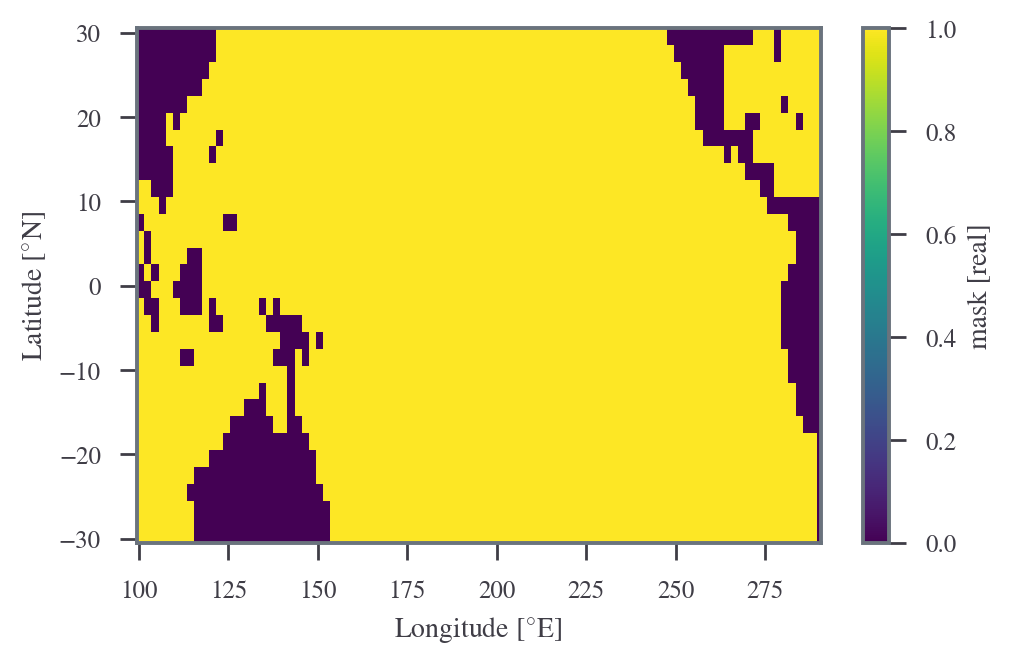

In [65]:
da_mask = xr.open_dataarray(TEST_DIREC / "ocean" / "DATA" / "om_mask.nc")
da_mask.X.attrs["units"] = r"$^{\circ}$E"
da_mask.X.attrs["long_name"] = "Longitude"
da_mask.Y.attrs["units"] = r"$^{\circ}$N"
da_mask.Y.attrs["long_name"] = "Latitude"
da_mask.sel(X=slice(100, 290), Y=slice(-30, 30)).plot()

## Fix problem

In [70]:
import shutil
from src.constants import DATA_PATH

In [75]:
shutil.copy(
    str(DATA_PATH / "ocean-model" / "DATA" / "qflx-0.nc"),
    os.path.join(OCEAN_DATA_PATH, "qflx-0.nc"),
)

'/home/users/sithom/seager19/ocean/DATA/qflx-0.nc'

In [77]:
shutil.copy(
    str(DATA_PATH / "ocean-model" / "DATA" / "qflx.nc"),
    os.path.join(OCEAN_DATA_PATH, "qflx.nc"),
)

'/home/users/sithom/seager19/ocean/DATA/qflx.nc'